In [1]:
# Dependencies
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
import pandas as pd
from config import tmdb_api_key
from config import omdb_api_key
import json
import numpy as np

In [2]:
# Check that the CSV was read properly
movie_list = pd.read_csv("movies.csv")
movie_list.head()

,Title
0,The Shawshank Redemption
1,The Godfather
2,The Dark Knight
3,The Godfather Part II
4,12 Angry Men


In [3]:
# Add id column to the DataFrame
movie_list['id'] = ''
movie_list

,Title,id
0,The Shawshank Redemption,
1,The Godfather,
2,The Dark Knight,
3,The Godfather Part II,
4,12 Angry Men,
...,...,...
245,Jai Bhim,
246,Aladdin,
247,Gandhi,
248,The Help,


In [4]:
# # TMDB API call
# movie=movie_list['Title'][100]
# base_url="https://api.themoviedb.org/3/search/movie?"
# build_url = f'https://api.themoviedb.org/3/search/movie?query={movie}api_key={tmdb_api_key}'
# response=requests.get(build_url).json()
# #print(response.url)
# print(json.dumps(response, indent=4, sort_keys=True))

In [5]:
#response['results'][0]['id']

In [6]:
# Loop through the CSV's Title column to call said movie from the API
# Create an empty list to store unfound movies in the TMDB database into
unfound_movies = []
for index, row in movie_list.iterrows():
    movie=movie_list['Title'][index]
    base_url="https://api.themoviedb.org/3/search/movie?"
    build_url = f'{base_url}query={movie}&api_key={tmdb_api_key}'
    response=requests.get(build_url).json()
    #print(response.url)

    try:
        movie_list.loc[index, "id"] = response['results'][0]['id']
    except (KeyError, IndexError):
        # If no movie name is found, set the movie id as NaN .
        movie_list.loc[index, "id"] = np.nan
        unfound_movies.append(movie_list.loc[index, "Title"])

In [7]:
# View the movies not found in the database
unfound_movies

['Gisaengchung', 'Oldeuboi', 'Capharnaüm']

In [8]:
#Print the DataFrame along with it's shape
print(movie_list.shape)
movie_list

(250, 2)


,Title,id
0,The Shawshank Redemption,278
1,The Godfather,238
2,The Dark Knight,155
3,The Godfather Part II,240
4,12 Angry Men,389
...,...,...
245,Jai Bhim,855400
246,Aladdin,420817
247,Gandhi,783
248,The Help,50014


In [9]:
# Export the City_Data into a csv
#movie_list.to_csv("movie_list.csv")

In [10]:
# movie_list_df = movie_list.loc[movie_list['id']=='NaN']
# movie_list_df

In [11]:
#Drop NaN rows
movie_list.dropna(how='any',inplace=True)

In [12]:
#Check size of Data Frame
movie_list.shape

(247, 2)

In [13]:
#Add columns name to the DataFrame
movie_list[['imdb_id',
            'budget',
            'genres',
            'revenue',
            'runtime',
            'popularity',
            'release_date',
            'production_countries'
            ,'tmdb_rating']] =''
movie_list

,Title,id,imdb_id,budget,genres,revenue,runtime,popularity,release_date,production_countries,tmdb_rating
0,The Shawshank Redemption,278,,,,,,,,,
1,The Godfather,238,,,,,,,,,
2,The Dark Knight,155,,,,,,,,,
3,The Godfather Part II,240,,,,,,,,,
4,12 Angry Men,389,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
245,Jai Bhim,855400,,,,,,,,,
246,Aladdin,420817,,,,,,,,,
247,Gandhi,783,,,,,,,,,
248,The Help,50014,,,,,,,,,


In [14]:
# # Defining the path for each column value

#imdb_id = url_byid_response['imdb_id']
#release_date = url_byid_response['release_date']
#url_byid_response['revenue']
#url_byid_response['runtime']

# #extracting genre names from list
# for i in range(0,len(url_byid_response['genres'])):
#     print(url_byid_response['genres'][i]['name'])

# #extracting genre names from list
# for i in range(0,len(url_byid_response['production_countries'])):
#     print(url_byid_response['production_countries'][i]['name'])

#url_byid_response['popularity']
#url_byid_response['budget']

#url_byid_response['vote_average']


In [15]:
# #API call, search movie by ID
# for i in range(0,len(movie_list['Title']))
#     movie_id=movie_list['id'][i]
#     url_ById = "https://api.themoviedb.org/3/movie/"
#     build_url_ById=f"{url_ById}{movie_id}?api_key={tmdb_api_key}"
#     url_byid_response=requests.get(build_url_ById).json()
#     #print(json.dumps(url_byid_response, indent=4, sort_keys=True))

In [16]:
# Loop through each movie's title for the API call and store the data we want to analyze into our DataFrame

for index, row in movie_list.iterrows():
# Create empty lists to store multiple-value columns' data into 
    genres = []
    production_countries = []
    try:
        movie_id=movie_list['id'][index]
        base_url_ById = "https://api.themoviedb.org/3/movie/"
        build_url_ById=f"{base_url_ById}{movie_id}?api_key={tmdb_api_key}"
        url_byid_response=requests.get(build_url_ById).json()
        movie_list.loc[index, "imdb_id"] = url_byid_response['imdb_id']
        movie_list.loc[index, "release_date"] = url_byid_response['release_date']
        movie_list.loc[index, "revenue"] = url_byid_response['revenue']
        movie_list.loc[index, "runtime"]= url_byid_response['runtime']
        movie_list.loc[index, "Title"]= url_byid_response['title']

        
        
        #extracting genre names from list
        for i in range(0,len(url_byid_response['genres'])):
            current_genre = url_byid_response['genres'][i]['name']
            genres.append(current_genre)
            

        #extracting production_countries names from list
        for i in range(0,len(url_byid_response['production_countries'])):
            current_prod_country = url_byid_response['production_countries'][i]['name']
            production_countries.append(current_prod_country)

        movie_list.loc[index, "popularity"] = url_byid_response['popularity']
        movie_list.loc[index, "budget"] = url_byid_response['budget']
        movie_list.loc[index, "tmdb_rating"] = url_byid_response['vote_average']
        movie_list.loc[index, "genres"] = ", ".join(genres)
        movie_list.loc[index, "production_countries"] = ", ".join(production_countries)
    except (KeyError, IndexError):
        # If no movie name is found, set the movie id as NaN .
        movie_list.loc[index, "imdb_id"] = np.nan
        movie_list.loc[index, "release_date"] = np.nan
        movie_list.loc[index, "revenue"] = np.nan
        movie_list.loc[index, "runtime"]= np.nan
        movie_list.loc[index, "popularity"] = np.nan
        movie_list.loc[index, "budget"] = np.nan
        movie_list.loc[index, "tmdb_rating"] = np.nan
        movie_list.loc[index, "production_countries"] = np.nan
        movie_list.loc[index, "genres"] = np.nan

        

In [24]:
movie_list.head()

,Title,id,imdb_id,budget,genres,revenue,runtime,popularity,release_date,production_countries,tmdb_rating
0,The Shawshank Redemption,278,tt0111161,25000000,"Drama, Crime",28341469,142,98.667,1994-09-23,United States of America,8.704
1,The Godfather,238,tt0068646,6000000,"Drama, Crime",245066411,175,134.974,1972-03-14,United States of America,8.709
2,The Dark Knight,155,tt0468569,185000000,"Drama, Action, Crime, Thriller",1004558444,152,94.409,2008-07-16,"United Kingdom, United States of America",8.512
3,The Godfather Part II,240,tt0071562,13000000,"Drama, Crime",102600000,202,63.334,1974-12-20,United States of America,8.59
4,12 Angry Men,389,tt0050083,350000,Drama,1000000,97,46.095,1957-04-10,United States of America,8.54


In [25]:
movie_list.shape

(247, 11)

In [26]:
# Create a new "Year" column from the "release date" by making a new df converting to datetime
movie_list["release_date"] = pd.to_datetime(movie_list["release_date"])
movie_list["Year"] = movie_list["release_date"].dt.year
# movie_list.drop("release_date", axis=1, inplace=True)
movie_list = movie_list = movie_list[["Title", "Year", "id", "imdb_id", "genres", "runtime", "budget", "revenue", "production_countries",
           "popularity", "tmdb_rating"]]
movie_list

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating
0,The Shawshank Redemption,1994,278,tt0111161,"Drama, Crime",142,25000000,28341469,United States of America,98.667,8.704
1,The Godfather,1972,238,tt0068646,"Drama, Crime",175,6000000,245066411,United States of America,134.974,8.709
2,The Dark Knight,2008,155,tt0468569,"Drama, Action, Crime, Thriller",152,185000000,1004558444,"United Kingdom, United States of America",94.409,8.512
3,The Godfather Part II,1974,240,tt0071562,"Drama, Crime",202,13000000,102600000,United States of America,63.334,8.59
4,12 Angry Men,1957,389,tt0050083,Drama,97,350000,1000000,United States of America,46.095,8.54
...,...,...,...,...,...,...,...,...,...,...,...
245,Jai Bhim,2021,855400,tt15097216,"Crime, Drama, Mystery",164,0,0,India,7.796,7.476
246,Aladdin,2019,420817,tt6139732,"Adventure, Fantasy, Romance, Family",127,183000000,1054304000,United States of America,53.261,7.113
247,Gandhi,1982,783,tt0083987,"Drama, History",191,22000000,77737889,"India, United Kingdom, United States of America",21.865,7.544
248,The Help,2011,50014,tt1454029,Drama,146,25000000,216639112,United States of America,67.526,8.202


In [27]:
# # Export the movie_df into a csv
# movie_list.to_csv("movie_df.csv")

In [28]:
# View if a movie had 0 budget or not (true/false)
no_budget = movie_list["budget"]==0
# null_imdb_id = movie_list.loc[movie_list]
no_budget

0      False
1      False
2      False
3      False
4      False
       ...  
245     True
246    False
247    False
248    False
249    False
Name: budget, Length: 247, dtype: bool

In [29]:
# # View how many movies with no budget had no revenue as well
# no_revenue = no_budget_df["revenue"]==0
# no_revenue.value_counts()

In [30]:
# View if a movie had 0 budget or not (true/false)
no_budget = movie_list["budget"]==0
# Drop all movies that do not have budget information (0)
movie_list=movie_list[~no_budget]

In [31]:
# View if a movie had 0 budget or not (true/false)
no_revenue = movie_list["revenue"]==0
# Drop all movies that do not have budget information (0)
movie_list=movie_list[~no_revenue]

In [32]:
# Check the lowest values (which should not be 0 now) to be positive all 0's were dropped
print("Lowest budget value now:")
print(movie_list["budget"].min())
print("Lowest revenue value now:")
print(movie_list["revenue"].min())

Lowest budget value now:
133000
Lowest revenue value now:
96568


In [33]:
movie_list.sample(5)

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating
108,To Kill a Mockingbird,1962,595,tt0056592,Drama,129,2000000,13129846,United States of America,21.371,8.004
86,3 Idiots,2009,20453,tt1187043,"Drama, Comedy",170,9000000,70000000,India,28.892,7.989
78,Princess Mononoke,1997,128,tt0119698,"Adventure, Fantasy, Animation",134,23500000,169000000,Japan,43.685,8.338
151,Kill Bill: Vol. 1,2003,24,tt0266697,"Action, Crime",111,30000000,180906076,United States of America,51.509,7.969
118,Incendies,2010,46738,tt1255953,"Drama, War, Mystery",131,6800000,6788659,"Canada, France",19.599,8.1


In [40]:
# Add new columns to store omdb data into current dataframe
movie_list[["imdb_rating", "imdb_votes"]] = ""
movie_list.sample(5)

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,decade,imdb_rating,imdb_votes
235,Pirates of the Caribbean: The Curse of the Bla...,2003,22,tt0325980,"Adventure, Fantasy, Action",143,140000000,655011224,United States of America,105.978,7.795,"(2000, 2010]",,
174,The Gold Rush,1925,962,tt0015864,"Adventure, Comedy, Drama",95,923000,4000000,United States of America,10.763,8.025,"(1920, 1930]",,
120,Bicycle Thieves,1948,5156,tt0040522,Drama,89,133000,436655,Italy,16.862,8.213,"(1940, 1950]",,
83,Toy Story 3,2010,10193,tt0435761,"Animation, Family, Comedy",103,200000000,1066969703,United States of America,68.431,7.791,"(2000, 2010]",,
11,Fight Club,1999,550,tt0137523,Drama,139,63000000,100853753,United States of America,86.01,8.439,"(1990, 2000]",,


In [43]:
omdb_api_key

'492872ac'

In [48]:
base_url1 = "http://www.omdbapi.com/?i=tt0435761&apikey=492872ac"
response1 = requests.get(base_url1).json()
response1

{'Title': 'Toy Story 3',
 'Year': '2010',
 'Rated': 'G',
 'Released': '18 Jun 2010',
 'Runtime': '103 min',
 'Genre': 'Animation, Adventure, Comedy',
 'Director': 'Lee Unkrich',
 'Writer': 'John Lasseter, Andrew Stanton, Lee Unkrich',
 'Actors': 'Tom Hanks, Tim Allen, Joan Cusack',
 'Plot': "The toys are mistakenly delivered to a day-care center instead of the attic right before Andy leaves for college, and it's up to Woody to convince the other toys that they weren't abandoned and to return home.",
 'Language': 'English, Spanish',
 'Country': 'United States, Japan',
 'Awards': 'Won 2 Oscars. 62 wins & 96 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTgxOTY4Mjc0MF5BMl5BanBnXkFtZTcwNTA4MDQyMw@@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.3/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '98%'},
  {'Source': 'Metacritic', 'Value': '92/100'}],
 'Metascore': '92',
 'imdbRating': '8.3',
 'imdbVotes': '870,953',
 'imdbID': 'tt04357

In [50]:
url1 = "http://www.omdbapi.com/?i="

test_response = requests.get(f"http://www.omdbapi.com/?i=tt0435761&apikey={omdb_api_key}").json()
test_response

{'Title': 'Toy Story 3',
 'Year': '2010',
 'Rated': 'G',
 'Released': '18 Jun 2010',
 'Runtime': '103 min',
 'Genre': 'Animation, Adventure, Comedy',
 'Director': 'Lee Unkrich',
 'Writer': 'John Lasseter, Andrew Stanton, Lee Unkrich',
 'Actors': 'Tom Hanks, Tim Allen, Joan Cusack',
 'Plot': "The toys are mistakenly delivered to a day-care center instead of the attic right before Andy leaves for college, and it's up to Woody to convince the other toys that they weren't abandoned and to return home.",
 'Language': 'English, Spanish',
 'Country': 'United States, Japan',
 'Awards': 'Won 2 Oscars. 62 wins & 96 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTgxOTY4Mjc0MF5BMl5BanBnXkFtZTcwNTA4MDQyMw@@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.3/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '98%'},
  {'Source': 'Metacritic', 'Value': '92/100'}],
 'Metascore': '92',
 'imdbRating': '8.3',
 'imdbVotes': '870,953',
 'imdbID': 'tt04357

In [60]:
# OMDB API Call
# url = "http://www.omdbapi.com/?i="
# api_key_url = "&apikey=" + omdb_api_key
# response = requests.get(url + {search_id} + api_key_url).json()
# print(json.dumps(response, indent=4, sort_keys=True))


for index, row in movie_list.iterrows():
    try:
        imdb_id=movie_list["imdb_id"][index]
        base_url_ById = "http://www.omdbapi.com/?i="
        build_url_ById=f"{base_url_ById}{imdb_id}&apikey={omdb_api_key}"
        url_byid_response=requests.get(build_url_ById).json()
        movie_list.loc[index, "imdb_rating"] = url_byid_response['imdbRating']
        movie_list.loc[index, "imdb_votes"] = url_byid_response['imdbVotes']
    except:
        movie_list.loc[index, "imdb_rating"] = np.nan
        movie_list.loc[index, "imdb_votes"] = np.nan

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,decade,imdb_rating,imdb_votes
112,Heat,1995,949,tt0113277,"Action, Crime, Drama",170,60000000,187436818,United States of America,49.037,7.907,"(1990, 2000]",8.3,"694,845"


In [62]:
movie_list.sample(5)

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,decade,imdb_rating,imdb_votes
167,Trainspotting,1996,627,tt0117951,"Drama, Crime",94,4000000,16491080,United Kingdom,23.118,7.969,"(1990, 2000]",8.1,"710,874"
55,Raiders of the Lost Ark,1981,85,tt0082971,"Adventure, Action",115,18000000,389925971,United States of America,67.945,7.925,"(1980, 1990]",8.4,"1,014,633"
144,The Truman Show,1998,37165,tt0120382,"Comedy, Drama",103,60000000,264118201,United States of America,60.945,8.134,"(1990, 2000]",8.2,"1,149,604"
44,The Intouchables,2011,77338,tt1675434,"Drama, Comedy",113,13000000,426588510,France,51.62,8.277,"(2010, 2020]",8.5,"900,538"
88,2001: A Space Odyssey,1968,62,tt0062622,"Science Fiction, Mystery, Adventure",149,12000000,71923560,"United Kingdom, United States of America",46.55,8.077,"(1960, 1970]",8.3,"699,710"


In [65]:
movie_list.shape

(221, 14)

In [71]:
# Check for any NaN values added to the new columns
print(movie_list["imdb_rating"].isnull().value_counts())
print(movie_list["imdb_votes"].isnull().value_counts())

imdb_rating
False    221
Name: count, dtype: int64
imdb_votes
False    221
Name: count, dtype: int64


# Movie Data Analysis

### Number of movies made throughout the decades

In [34]:
# Define bins
bins = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]

# Cut the data into custom intervals
movie_list["decade"] = pd.cut(movie_list["Year"], bins=bins)

movie_list.sample(5)

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,decade
15,The Matrix,1999,603,tt0133093,"Action, Science Fiction",136,63000000,463517383,United States of America,83.956,8.208,"(1990, 2000]"
61,The Shining,1980,694,tt0081505,"Horror, Thriller",144,19000000,44781695,"United Kingdom, United States of America",62.504,8.22,"(1970, 1980]"
246,Aladdin,2019,420817,tt6139732,"Adventure, Fantasy, Romance, Family",127,183000000,1054304000,United States of America,53.261,7.113,"(2010, 2020]"
158,V for Vendetta,2006,752,tt0434409,"Action, Thriller, Science Fiction",132,54000000,132511035,"Germany, United Kingdom, United States of America",37.223,7.898,"(2000, 2010]"
94,Lawrence of Arabia,1962,947,tt0056172,"Adventure, Drama, History, War",228,15000000,69995385,United Kingdom,38.685,7.978,"(1960, 1970]"


<Axes: title={'center': 'Number of Movies per Decade'}, xlabel='Decade', ylabel='# of Movies'>

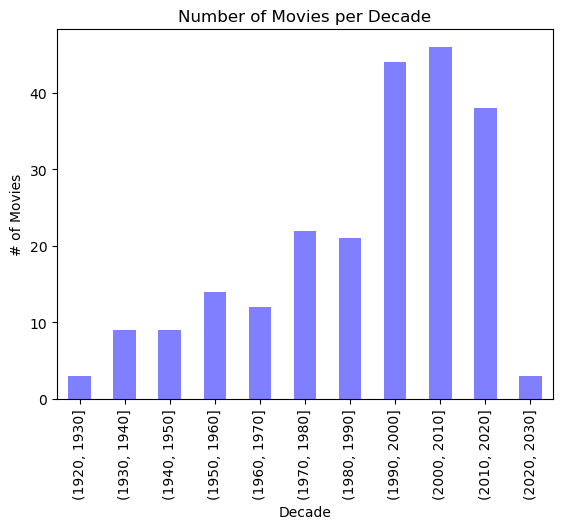

In [35]:
# Create a bar chart based on the data

# x_axis = np.arange(movie_list["decade"].unique)
y_axis = movie_list.groupby("decade").count()["Title"]
y_axis.plot(kind="bar", color="blue", alpha=.5, title="Number of Movies per Decade", xlabel="Decade", 
            ylabel="# of Movies")
# plt.plot(movie_list["decade"], movie_list["runtime"], kind="bar", color="red")
# plt.show()

### Runtime over the years

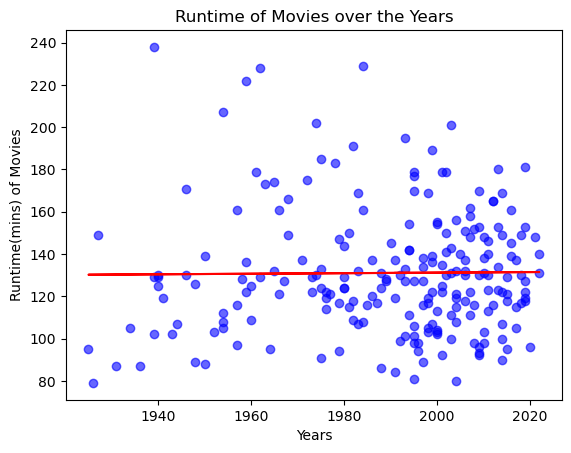

r value:  0.010447790724258058


In [36]:
# Create a scatter plot for regression analysis
x_values = movie_list['Year']
y_values = movie_list['runtime'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.6, color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Years')
plt.ylabel('Runtime(mins) of Movies')
plt.title("Runtime of Movies over the Years")
plt.show()
print("r value: ",rvalue)

In [74]:
movie_list["revenue"].dtype

dtype('O')

In [ ]:
# movie_list.loc["genres"].value_counts()

In [ ]:
# Import the Oscar csv to analyze
oscar_list = pd.read_csv("the_oscar_award.csv")
print(oscar_list.shape)
oscar_list.head(2)

In [ ]:
# Check how many Oscar nominations each film has
oscar_list["film"].value_counts()

In [ ]:
# Import the golden globes csv to analyze
gglobe_list = pd.read_csv("golden_globe_awards.csv")
print(gglobe_list.shape)
gglobe_list.head(2)

In [ ]:
# Check how many Golden Globe nominations each film has
gglobe_list["film"].value_counts()

In [ ]:
# # This will split a cell with multiple values back into a list
# newvar = movie_list.loc[9, "production_countries"].split(", ")
# newvar[2]

In [ ]:
# # Testing the Pandas "explode" function
# checkexplode = movie_list["genres"].explode('drama')
# checkexplode

In [ ]:
# Create a "contains value" function in Python to call on to pull specific genre or production country information
def contains_value(val, search_val):
    return search_val in val.split(', ')

In [ ]:
# crime_df = movie_list[movie_list['genres'].apply(lambda x: contains_value(x, 'Crime'))]
# drama_df = movie_list[movie_list['genres'].apply(lambda x: contains_value(x, 'Drama'))]


# # merge1_df = pd.merge(crime_df, drama_df, on=["Title", "Year", "id", "budget", "revenue", "popularity"])
# # merge1_df
# # merge1_df.groupby["Year"]
# # merge1_df

In [ ]:
# # Creating empty lists to split multiple-value columns' values into
# genre_list = []
# prod_country_list = []

# for index, row in movie_list.iterrows():
#     genre_list.append(movie_list.loc[index, "genres"].split(", "))
#     prod_country_list.append(movie_list.loc[index, "production_countries"])

# genre_df = pd.DataFrame(genre_list)
# prod_country_df = pd.DataFrame(prod_country_list)
# genre_df